In [1]:
import os
import torch
import numpy as np
import random
from utils import buildDataset

## build dataset

In [2]:
defaultStrategy = "./DefaultStrategy.txt"
defaultOutput = "./defaultOutputs.txt"
strategy = "./strategy.txt"
output = "./outputs.txt"
dataset = buildDataset.getData(strategy, output, defaultStrategy, defaultOutput)

In [3]:
len(dataset)

77

In [4]:
dataset[0]

[[{'size': 7,
   'offset': 0,
   'mazeEndIter': 3,
   'MarkerCost': 0,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  10178],
 [{'size': 7,
   'offset': -2,
   'mazeEndIter': 3,
   'MarkerCost': 8,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  569],
 [{'size': 7,
   'offset': -5,
   'mazeEndIter': 3,
   'MarkerCost': 8,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  499],
 [{'size': 7,
   'offset': 0,
   'mazeEndIter': 8,
   'MarkerCost': 32,
   'FixedShapeCost': 16,
   'Decay': 0.95,
   'ripupMode': 1,
   'followGuide': 0},
  1],
 [{'size': 7,
   'offset': -1,
   'mazeEndIter': 8,
   'MarkerCost': 32,
   'FixedShapeCost': 16,
   'Decay': 0.95,
   'ripupMode': 1,
   'followGuide': 0},
  0]]

# Turning datapoint to tensor

To represent a single data point input, we use a tensor of size <No_Strategy x 1 x 9>. (9 includes 8 DRC sequence items, and 1 output DRC value)

In [5]:
Dataset, Label = buildDataset.LSTMdatasetToTensor(dataset)

In [6]:
len(Dataset)

77

In [7]:
Dataset[0]

tensor([[[ 7.0000e+00,  0.0000e+00,  3.0000e+00,  0.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  1.0178e+04]],

        [[ 7.0000e+00, -2.0000e+00,  3.0000e+00,  8.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  1.0178e+04]],

        [[ 7.0000e+00, -5.0000e+00,  3.0000e+00,  8.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  5.6900e+02]],

        [[ 7.0000e+00,  0.0000e+00,  8.0000e+00,  3.2000e+01,  1.6000e+01,
           9.5000e-01,  1.0000e+00,  0.0000e+00,  4.9900e+02]],

        [[ 7.0000e+00, -1.0000e+00,  8.0000e+00,  3.2000e+01,  1.6000e+01,
           9.5000e-01,  1.0000e+00,  0.0000e+00,  1.0000e+00]]])

In [8]:
Dataset[0].size()

torch.Size([5, 1, 9])

In [9]:
Label[0]

tensor([[[1.0178e+04]],

        [[5.6900e+02]],

        [[4.9900e+02]],

        [[1.0000e+00]],

        [[0.0000e+00]]])

In [10]:
Label[0].size()

torch.Size([5, 1, 1])

# train-test split of the dataset

In [11]:
X_train, Y_train, X_test, Y_test = buildDataset.LSTMsplitDataset(Dataset, Label, trainSize = 0.7)

In [12]:
len(X_train)

53

In [13]:
len(X_test)

24

In [14]:
X_train[0]

tensor([[[ 7.0000e+00,  0.0000e+00,  5.9000e+01,  1.2000e+01,  2.5000e+01,
           5.3203e-01,  0.0000e+00,  1.0000e+00,  2.7958e+04]],

        [[ 7.0000e+00, -1.0000e+00,  9.0000e+00,  4.0000e+00,  5.6000e+01,
           7.2573e-01,  0.0000e+00,  1.0000e+00,  2.7958e+04]],

        [[ 7.0000e+00, -2.0000e+00,  3.4000e+01,  8.0000e+00,  6.3000e+01,
           8.7037e-01,  0.0000e+00,  1.0000e+00,  1.0443e+04]],

        [[ 7.0000e+00, -3.0000e+00,  3.5000e+01,  2.0000e+00,  3.7000e+01,
           7.1772e-01,  1.0000e+00,  0.0000e+00,  1.0690e+04]],

        [[ 7.0000e+00, -4.0000e+00,  1.1000e+01,  3.0000e+00,  1.1000e+01,
           6.2663e-01,  1.0000e+00,  0.0000e+00,  1.4090e+03]],

        [[ 7.0000e+00, -5.0000e+00,  5.0000e+00,  2.0000e+00,  5.3000e+01,
           7.0020e-01,  1.0000e+00,  0.0000e+00,  1.0600e+02]],

        [[ 7.0000e+00, -6.0000e+00,  6.3000e+01,  8.0000e+00,  6.5000e+01,
           5.6006e-01,  1.0000e+00,  0.0000e+00,  3.0000e+00]],

        [[ 7.0000e+0

In [15]:
X_train[0].size()

torch.Size([8, 1, 9])

In [16]:
Y_train[0]

tensor([[[2.7958e+04]],

        [[1.0443e+04]],

        [[1.0690e+04]],

        [[1.4090e+03]],

        [[1.0600e+02]],

        [[3.0000e+00]],

        [[2.0000e+00]],

        [[0.0000e+00]]])

In [17]:
Y_train[0].size()

torch.Size([8, 1, 1])

# Creating the Network

In [18]:
# reference: https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, numLayers):
        super(LSTM, self).__init__()
        self.numLayers = numLayers
        self.mapping = nn.Sigmoid()

        self.lstm = nn.LSTM(input_size, 1, num_layers=self.numLayers)

    def forward(self, inputData):
        intput = self.mapping(inputData)
        output, _ = self.lstm(intput)
        return output

In [21]:
n_input = len(X_train[0][0][0])
numLayers = 10

In [22]:
n_input

9

In [23]:
model = LSTM(n_input, numLayers)

# Run a step of the network

To run a step of this network we need to pass an input (in our case, the Tensor for the current strategy) and a previous hidden state (which we initialize as zeros at first). We’ll get back the output (probability of drcs) and a next hidden state (which we keep for the next step).

In [24]:
import torch

In [25]:
inputStrategy = X_train[0]

output = model(inputStrategy)

In [26]:
output

tensor([[[0.0440]],

        [[0.0618]],

        [[0.0704]],

        [[0.0750]],

        [[0.0777]],

        [[0.0793]],

        [[0.0803]],

        [[0.0810]]], grad_fn=<MkldnnRnnLayerBackward0>)

# Training

In [27]:
criterion = nn.MSELoss()

In [28]:
learning_rate = 0.001 # If you set this too high, it might explode. If too low, it might not learn

In [29]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
import time
import math

In [31]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

In [32]:
n_iters = 1000
print_every = 10
plot_every = 1

In [33]:
def train(x, y):

    model.zero_grad()

    output = model(x)
    
    loss = criterion(output, y)
    loss.backward()

    optimizer.step()

    return output, loss.item()

In [34]:
# Keep track of losses for plotting
current_loss = 0
all_losses = []

In [35]:
for iter in range(1, n_iters + 1):
    # randomly generate an index in training set
    index = random.randint(0, len(X_train) - 1)
    x = X_train[index]
    y = Y_train[index]
    output, loss = train(x, y)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        print('%d %d%% (%s) %.4f' % (iter, iter / n_iters * 100, timeSince(start), loss))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

10 1% (0m 12s) 184567232.0000
20 2% (0m 12s) 173219840.0000
30 3% (0m 12s) 121282448.0000
40 4% (0m 12s) 50704936.0000
50 5% (0m 13s) 328512.9062
60 6% (0m 13s) 57656736.0000
70 7% (0m 13s) 52842364.0000
80 8% (0m 14s) 360262.7812
90 9% (0m 14s) 1753095168.0000
100 10% (0m 14s) 30636724.0000
110 11% (0m 14s) 29063532.0000
120 12% (0m 15s) 757277.5000
130 13% (0m 15s) 673685056.0000
140 14% (0m 16s) 1129058688.0000
150 15% (0m 16s) 52842204.0000
160 16% (0m 16s) 1632434048.0000
170 17% (0m 16s) 6812749.5000
180 18% (0m 17s) 2043354240.0000
190 19% (0m 17s) 6738.3940
200 20% (0m 17s) 757242.8125
210 21% (0m 17s) 9915317.0000
220 22% (0m 18s) 1129057920.0000
230 23% (0m 18s) 343959008.0000
240 24% (0m 18s) 1129057664.0000
250 25% (0m 19s) 184566528.0000
260 26% (0m 19s) 2043352832.0000
270 27% (0m 20s) 328474.0312
280 28% (0m 20s) 10834.3018
290 28% (0m 21s) 30636458.0000
300 30% (0m 21s) 29063254.0000
310 31% (0m 21s) 12856.3184
320 32% (0m 22s) 50704464.0000
330 33% (0m 22s) 360236.2500

# Result evaluation

In [36]:
# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))
# plt.plot(history)
# plt.show()

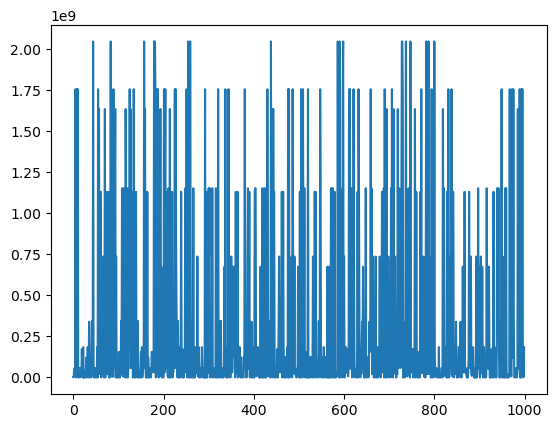

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [38]:
all_losses

[3448391.75,
 10840.1435546875,
 50704968.0,
 57053304.0,
 57053304.0,
 1753095680.0,
 3448390.5,
 12864.2939453125,
 1753095552.0,
 184567232.0,
 1753095552.0,
 6812829.5,
 15375.85546875,
 30636794.0,
 57679340.0,
 10538.2373046875,
 9915435.0,
 57656756.0,
 20832674.0,
 173219840.0,
 52842416.0,
 10538.173828125,
 184567216.0,
 10839.8828125,
 30636788.0,
 12864.0556640625,
 10538.125,
 757302.3125,
 57053280.0,
 121282448.0,
 328514.28125,
 33172928.0,
 184567216.0,
 52842404.0,
 15375.576171875,
 338667552.0,
 57656748.0,
 360265.28125,
 3448387.75,
 50704936.0,
 360265.25,
 343959232.0,
 343959232.0,
 50704936.0,
 2043355520.0,
 20832662.0,
 15375.4365234375,
 52842384.0,
 57679300.0,
 328512.90625,
 6741.87646484375,
 10537.8876953125,
 15375.3486328125,
 184567152.0,
 6741.82763671875,
 1753095552.0,
 33172914.0,
 1632434816.0,
 20750014.0,
 57656736.0,
 735417856.0,
 1129059200.0,
 328511.65625,
 29063580.0,
 25831352.0,
 184567152.0,
 735417856.0,
 673685376.0,
 10839.375,
 5

# Running one unseen inputs

In [39]:
# Just return an output given an input
def evaluate(x):
    
    output = model(x)

    return output

In [40]:
def predict(x):
    with torch.no_grad():
        output = evaluate(x)
    return output

In [41]:
results = []
for index in range(len(X_test)):
    x = X_test[index]
    output = predict(x)
    results.append(output)

In [42]:
results[0]

tensor([[[0.4517]],

        [[0.6507]],

        [[0.7021]],

        [[0.7136]],

        [[0.7162]]])